In [1]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [3]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data\heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (features matrix) choose from age to thal
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"] # 0: no heart disease, 1: got heart disease

In [5]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Abid\PIAIC and ZTM\sample_project1\env\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 23.0.1
   setuptools: 66.0.0
        numpy: 1.23.5
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.1.1
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\Abid\PIAIC and ZTM\sample_project1\env\Library\bin\mkl_rt.1.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2021.4-Product
    num_threads: 2
threading_layer: intel

       filepath: C:\Users\Abid\PIAIC and ZTM\sample_project1\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 4


In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

# test_size=0.2, 80% of data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Build a forest of trees from the training set (X, y)
clf.fit(X_train, y_train);

In [11]:
# make a prediction

#np.array(X_test) converts DataFrame into an array - the data will be the same,only the form of the data is changed to an array


y_preds = clf.predict(np.array(X_test))
y_preds

C:\Users\Abid\PIAIC and ZTM\sample_project1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [12]:
y_test

240    0
110    1
85     1
234    0
184    0
      ..
198    0
55     1
33     1
152    1
204    0
Name: target, Length: 61, dtype: int64

In [13]:
# 4. Evaluate the model on the training data and test data

# Returns the mean accuracy on the given test data and labels
clf.score(X_train, y_train)

1.0

In [14]:
clf.score(X_test, y_test)

0.8032786885245902

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))







              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



From NG Andrew Lessons: 

In scewed classes, it becomes more harder to use just classification accuraccy, so we use Precesion/Recall Error Matric 

Precision: out of predicted positives, how many are True Positives (actually have the disease): 


Precision= True Positives / Predicted Positives 

(Predicted Positives =  True Positives and False Positives)


Recall: Out of actual positives (actual patients), how many were diagnosed correctly.



Recall= True Positives/ Actual Positives 


Actual Positives= True Positives+False Negatives

(Note:False negatives is the patients which we classified as negatives but they were positives)


F1 Score = 2 (PR/P+R)







ZTM Lecture:

- The precision will be "how many are correctly classified among that class"
- The recall means "how many of this class you find over the whole number of element of this class"
- The f1-score is the harmonic mean between precision & recall
- The support is the number of occurence of the given class in your dataset (so you have 37.5K of class 0 and 37.5K of class 1, which is a really well balanced dataset.

In [16]:
# Compute confusion matrix to evaluate the accuracy of a classification
confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 5, 27]], dtype=int64)

In [17]:
# Accuracy classification score
accuracy_score(y_test, y_preds)

0.8032786885245902

In [18]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    #100:.2f will round off the digits after decimal. Note, any thing written in {} is considered as 'calcuation area' by Python
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 83.61%

Trying model with 20 estimators...
Model accuracy on test set: 83.61%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 78.69%

Trying model with 50 estimators...
Model accuracy on test set: 75.41%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 83.61%

Trying model with 80 estimators...
Model accuracy on test set: 81.97%

Trying model with 90 estimators...
Model accuracy on test set: 83.61%



In [19]:
# 6. Save a model and load it
import pickle # Python object serialization

pickle.dump(clf, open("random_forst_model_1.pkl", "wb")) # write binary

In [20]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb")) # read binary
loaded_model.score(X_test, y_test)

0.8360655737704918

Now, we will visit each step in details


## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
1. Split the data into features and labels (usually `X` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split the data into features and labels (usually X & y)
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
# Split the data into features and labels (usually X & y)
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [26]:
X.shape[0] * 0.8

242.4

In [27]:
242 + 61

303

In [28]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical

In [29]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
# treat doors as categorical
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [31]:
len(car_sales)

1000

In [32]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [33]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [34]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


## code to show image, from the image folder, in the markdown cell

#One-hot encoding is essentially the representation of categorical variables as binary vectors. These categorical values are first mapped to integer values. Each integer value is then represented as a binary vector


<img src="images/one-hot-encoding.jpg" />

# Encoding categorical features

ORDINAL ENCORDER


Often features are not given as continuous values but categorical. 

For example a person could have features ["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]. Such features can be efficiently coded as integers, for instance ["male", "from US", "uses Internet Explorer"] could be expressed as [0, 1, 3] while ["female", "from Asia", "uses Chrome"] would be [1, 2, 1].


To convert categorical features to such integer codes, we can use the OrdinalEncoder. This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1):

Such integer representation can, however, not be used directly with all scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired (i.e. the set of browsers was ordered arbitrarily).


ONE-HOT-ENCODER

For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation



(Another possibility to convert categorical features to features that can be used with scikit-learn estimators is to use a one-of-K, also known as one-hot or dummy encoding. This type of encoding can be obtained with the OneHotEncoder, which transforms each categorical feature with n_categories possible values into n_categories binary features, with one of them 1, and all others 0)

Continuing the example above:

>>> enc = preprocessing.OneHotEncoder()
>>> X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
>>> enc.fit(X)
OneHotEncoder()
>>> enc.transform([['female', 'from US', 'uses Safari'],
...                ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])



In [35]:
#one hot encoding using Pandas
    

dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [5]:

# Turn the categories into numbers using Scikit Learn


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Encode categorical integer features as a one-hot numeric array
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

# Applies transformers to columns of an array or pandas DataFrame

#Note that below, there is tupple within the list when ColumnTransformer is used.
#Without the tupple, the system will throw an error

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

NameError: name 'X' is not defined

In [37]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [6]:
# Let's try to refit the model
np.random.seed(42)

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)


# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

NameError: name 'np' is not defined

In [39]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [40]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [42]:
# show number of column with missing value
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

### Option 1: Fill missing data with Pandas

In [44]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column. Filled with mean values
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column. Most cars have 4 doors
car_sales_missing["Doors"].fillna(4, inplace=True)

In [45]:
# show number of column with missing value
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [46]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [47]:
# show number of column with missing value
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [48]:
len(car_sales_missing)

950

In [49]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [50]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [51]:
# Turn categorical into numberical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder() #set OneHotEncoder aurgument sparse_output=False, this will avoid output of Sparse Matrix


transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [52]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [53]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3281222657899089

### Option 2: Filling missing values with Scikit-Learn

The main takeaways:
- Split your data first (into train/test)
- Fill/transform the training set and test sets separately
- Don't use data from the future (test set) to fill data from the past (training set)

In [54]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [55]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [56]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [57]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
# Check missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [59]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Define filling strategy; fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [60]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [61]:
car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [62]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.fit_transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [63]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train) # train
model.score(transformed_X_test, y_test) # test




0.25366332156443805

In [64]:
# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses 'estimator' as another term for machine learning model or algorithm.

- Classification - predicting whether a sample is one thing or another. Clf is common classification name which is used
- Regression - predicting a number



Google Sklearn data set to see the dataset we have in Sklearn doumentation. There are many toy dataset and realworld datasets are available.

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html





### 2.1 Picking a machine learning model for a regression problem

In [65]:

"""
#old code
#from sklearn.datasets import load_boston
#boston = load_boston()
#boston;
"""



# Import California housing dataset

from sklearn.datasets import fetch_california_housing

housing=fetch_california_housing()



housing




{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [66]:
# convert dataset into pandas dataframe

#boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
#boston_df["target"] = pd.Series(boston["target"])
#boston_df.head()

housing_df=pd.DataFrame(housing["data"], columns=housing["feature_names"])

housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [67]:
#adding housing["target"] to housing_df

housing_df["MedHouseVal"]=housing["target"]


In [68]:
# How many samples?
#len(boston_df)

len(housing_df)


housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [69]:
#checked user guide, online sciket learn documentation about details of the database features

#rename the column name from MedHouseVal to target


housing_df.rename(columns={"MedHouseVal":"target"},inplace=True)


In [70]:
np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]


In [71]:
X_train,X_test,y_train,y_test=train_test_split (X,y,test_size=0.2)


from sklearn.linear_model import Ridge


model=Ridge()

model.fit(X_train,y_train)
#model.coef_

model.score(X_test,y_test)



0.5758549611440125

#  Cooefficient of determination


I have checked the docstring of Linear Regression, it has returned Cooefficient of Determination.
(Logistic Regression/ Classification models return Mean Accuracy)

The coefficient of determination (R²) is a number between 0 and 1 that measures how well a statistical model predicts 
an outcome. The outcome is represented by the model’s dependent variable (target variable).More technically, R2 is a measure of goodness of fit



#now using Lasso model - the one which is shown in Scikit learn model choice cheat-sheet



# Ensemble methods

https://scikit-learn.org/stable/modules/ensemble.html

    

    The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished: Average Method and Squential Method

In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

Examples: Bagging methods, Forests of randomized trees, …

By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

Examples: AdaBoost, Gradient Tree Boosting, …
    

## Decision Trees (DTs) 

These are a non-parametric supervised learning method used for classification and regression. 
The goal is to create a model that predicts the value of a target variable 
by learning simple decision rules inferred from the data features.
A tree can be seen as a piecewise constant approximation.



https://www.ibm.com/topics/decision-trees

It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

As you can see from the diagram above, a decision tree starts with a root node, which does not have any incoming branches. The outgoing branches from the root node then feed into the internal nodes, also known as decision nodes. Based on the available features, both node types conduct evaluations to form homogenous subsets, which are denoted by leaf nodes, or terminal nodes. The leaf nodes represent all the possible outcomes within the dataset. 


A nice video about Regressive Decision Tree by Stat Quest- the same publisher has also a video about Classification Decision Tree


https://www.youtube.com/watch?v=g9c66TUylZ4&t=0s&ab_channel=StatQuestwithJoshStarmer




Random Forrest is the combination of lots of Desicion Trees


In [72]:
#How do we improve this score?

#What if Ridge wasn't working?

#Let's refer back to the map...
#https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
    
from sklearn.linear_model import Lasso

model=Lasso()

model.fit(X_train,y_train)
model.coef_

model.score(X_test,y_test)





0.2841671821008396

In [73]:
# Let's try the Random Forst Regressor
from sklearn.ensemble import RandomForestRegressor


# Setup random seed
np.random.seed(42)


#n_estimator=100 means there are 100 smaller models - the decision trees that will be working on our data

# Instatiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)




rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8051230593157366

In [74]:
# Check the Ridge model again
model.score(X_test, y_test)

0.2841671821008396

### 2.2 Choosing an estimator for a classification problem
Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [75]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC.

In [77]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\Abid\PIAIC and ZTM\sample_project1\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [78]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [79]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

In [80]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:

- X = features, features variables, data
- y = labels, targets, target variables

In [81]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [82]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [83]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. predict()
2. predict_proba()

In [84]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [86]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [87]:
clf.score(X_test, y_test)

0.8524590163934426

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba() - use this if someone asks you "what's the probability your model is assigning to each prediction?"

In [89]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(X_test[:5])
# [% for 0, % for 1]

#The first column is the probability that the entry has the -1 label 
#and the second column is the probability that the entry has the +1 label.

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [90]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [91]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [92]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

predict() can also be used for regression models.

In [93]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [94]:
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [95]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [96]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [97]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

#In Stats:Absolute Error is the amount of error in your measurements.It is the diff. between the measured value & “true” value.
#The Mean Absolute Error(MAE) is the average of all absolute errors.



#In the context of machine learning, absolute error refers to the magnitude of difference
#between the prediction of an observation and the true value of that observation.


mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [98]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/esitmators:
- Estimator score method
- The scoring parameter
- Problem-specific metric functions.

### 4.1 Evaluating a model with the score method

In [99]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
clf.score(X_train, y_train)

1.0

In [101]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression...

In [102]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [103]:
model.score(X_train, y_train)

0.9736801960414609

In [104]:
model.score(X_test, y_test)

0.8065734772187598

### 4.2 Evaluating a model using the scoring parameter

In [105]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

In [106]:
clf.score(X_test, y_test)

0.8524590163934426

<img src="images/cross-validation.jpg" />

In [107]:
# Evaluate a score by cross-validation
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [108]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [109]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

#even though cross_val_score mean is lower than Single_Score,but you should use CVS to report accuracy of your model

(0.8524590163934426, 0.8248087431693989)

In [110]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [111]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [113]:
np.mean(cross_val_score)

0.8248087431693989

In [114]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area Under the Receiver Operating Characteristic curve (AUC/ROC)**

- Area under curve (AUC)
- ROC curve (Receiver operating characteristic Curve)

**ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr)**
- True positive = model predicts 1 when truth is 1
- False positive = model predicts 1 when truth is 0
- True negative = model predicts 0 when truth is 0
- False negative = model predicts 0 when truth is 1

In [3]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NameError: name 'train_test_split' is not defined

In [116]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [117]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10], len(y_probs_positive)

(array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ]), 61)

In [118]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)


#THRESHOLD is the probablity which is set to decide if a case is classified as 1 or 0 

# Check the false positive rates
fpr, len(fpr), tpr, len(tpr), thresholds

(array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
        0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
        0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
        0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
        1.        ]),
 26,
 array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
        0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
        0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
        0.9375 , 0.96875, 0.96875, 1.     , 1.     ]),
 26,
 array([2.  , 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
        0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
        0.28, 0.23, 0.2 , 0.  ]))

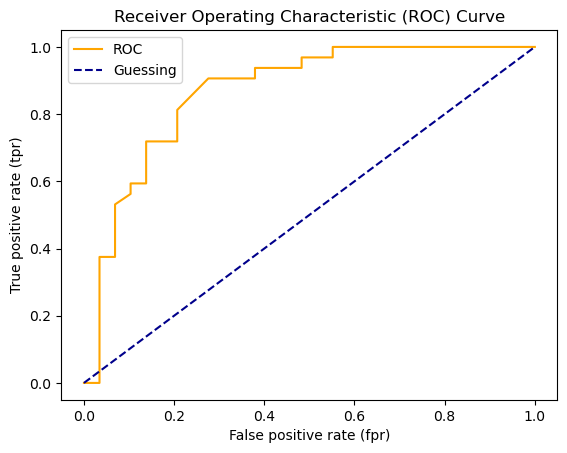

In [119]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    #THIS LINE IN THE MID TELLS US THAT PRPORTION OF CORRECTLY CLARRIFIED AND INCORRECTLY CLASSIFIED CASES ARE SAME 
    #ON PLOT (0,0) AND (1,1) IS PLOTTED TO DRAW THE LINE IN THE MID
    # ROC CURVE AND RUC HELP US TO DECIDE BEST THRESHOLD TO MINIMIZE ERRORS 
    
        
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [120]:
from sklearn.metrics import roc_auc_score

# area under the curve, max area = 1
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

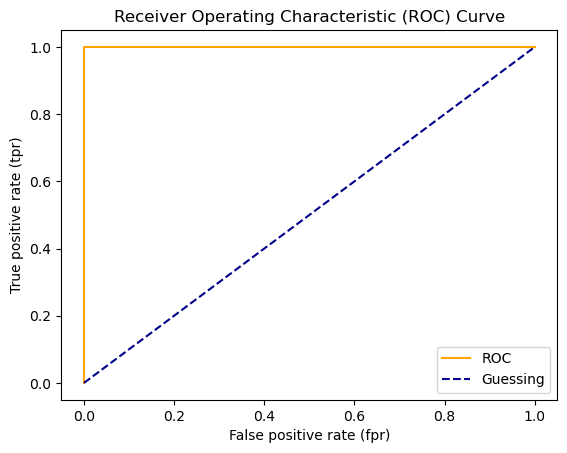

In [121]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [122]:
# Perfect AUC score=1, that is area below the ROC curve is fully bland
roc_auc_score(y_test, y_test)

1.0

# **Confusion Matrix**

#THIS CLASSIFICATION EVALUATION METRIC IS CALLED CONFUSION MATRIX


A confusion matrix is a metric quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

<img src="images/confusion-matrix.jpg" />

In [123]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [124]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [125]:
22 + 7 + 8 + 24,len(X_test)

(61, 61)

In [126]:
import sys
#!conda install --yes --prefix {sys.prefix} seaborn

#prefix is the path name
# "!" is called bang function - it is the way to tell Jupyter that run batch command (like we do in prompt command) 

In [127]:
sys.prefix


'C:\\Users\\Abid\\PIAIC and ZTM\\sample_project1\\env'

In [128]:
#the above code didn't work as it was showing error of envoirnment unavailablity 
# so I copied the below code from the net


#pip install seaborn

#the above installation was later commetted as it was raising error on re-running the cells


In [129]:
#!ls #work like ls command on command prompt (it is not working, so may need to Google it)

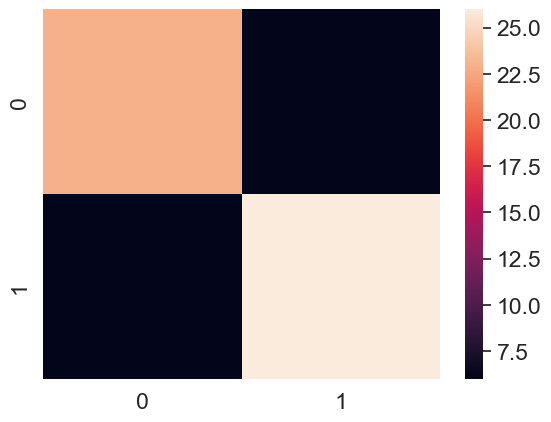

In [130]:
# Make our confusion matrix more visual with Seaborn's heatmap()
#SEABORN IS A LIBRARY WHICH IS BUILT ON MATPLOT LIB AND IT IS EASIER TO USE
# we can install missing Searborn liabrary from command prompt--> activate the envoirnment and run "conda install seaborn"
#ALTERNATIVELY, IT CAN BE INSTALLED FROM JUPYTER NOTEBOOK - AS I HAVE JUST DONE IN ABOVE CELL 


import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

**Note**: In the original notebook, the function below had the "True label" as the x-axis label and the "Predicted label" as the y-axis label. But due to the way confusion_matrix() outputs values, these should be swapped around. The code below has been corrected.

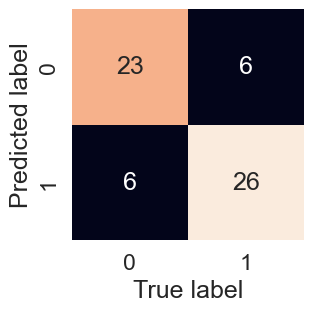

In [131]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(conf_mat)

In [132]:
"""
#the below code was not working, so i have copied new code from the lecuture video
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(clf, X, y)

""" 



'\n#the below code was not working, so i have copied new code from the lecuture video\nfrom sklearn.metrics import plot_confusion_matrix\n\n\nplot_confusion_matrix(clf, X, y)\n\n'

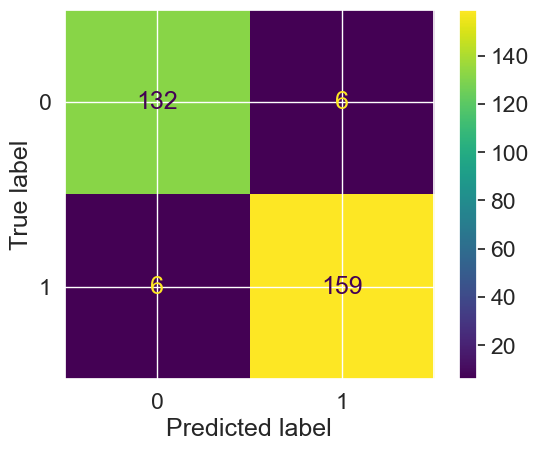

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay 


ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

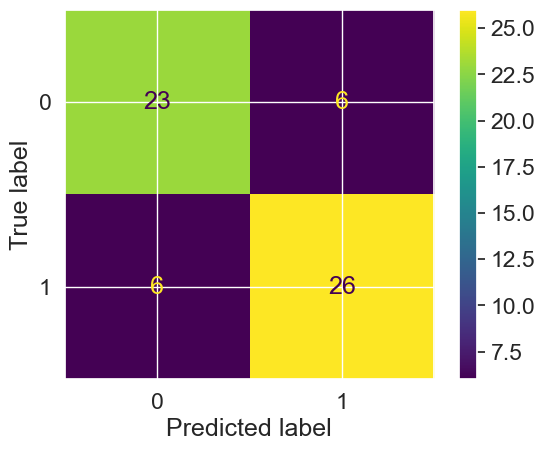

In [134]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds
                                       )

**Classification Report**

- Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Precision:- Accuracy of positive predictions.



- Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0. 


Recall:- Fraction of positives that were correctly identified.



- F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

- Support - The number of samples each metric was calculated on. Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- Macro avg - Short for macro average, the average precision, recall and F1 score between classes. 
- Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.

- Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

In [135]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



The support is the number of occurence of the given class in your dataset 
so you have 29 of class 0 and 32 of class 1, which is a well balanced dataset.
The thing is, precision and recall is highly used for imbalanced dataset because
in an highly imbalanced dataset, a 99% accuracy can be meaningless.

In this example, we use the predict method to generate predicted labels for the test set. 
We then round the predicted labels to the nearest integer (0 or 1) since our model outputs a probability between 0 and 1.
                                                                         

# EXAMPLE

                          precision recall    f1-score   support

               Not Spam   0.92      0.95      0.93       500
               Spam       0.80      0.70      0.75       100

           accuracy                           0.89       600
           macro avg      0.86      0.83      0.84       600
           weighted avg   0.89      0.89      0.89       600



****************
Precision: For the “Not Spam” class, the precision is 0.92, indicating that 92% of the emails predicted as “Not Spam” are 
correct. For the “Spam” class, the precision is 0.80, meaning that 80% of the emails predicted as “Spam” are correct.

****************
Recall: The recall for the “Not Spam” class is 0.95, indicating that the model captures 95% of the actual “Not Spam”
emails. For the “Spam” class, the recall is 0.70, meaning that the model captures only 70% of the actual “Spam” emails.

****************
F1-score: The F1-score for the “Not Spam” class is 0.93, balancing precision and recall. For the “Spam” class, the F1-score is 0.75.
Support: The dataset contains 500 instances of “Not Spam” and 100 instances of “Spam.”



In [136]:
(0.79 *0.79)/(0.79+0.79)

0.395

In [137]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case


disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\Abid\PIAIC and ZTM\sample_project1\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abid\PIAIC and ZTM\sample_project1\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abid\PIAIC and ZTM\sample_project1\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

- **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
- **Precision** and recall become more important when classes are imbalanced.
- If false positive predictions are worse than false negatives, aim for higher precision.
- If false negative predictions are worse than false positives, aim for higher recall.
- **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: 
- Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. 
- For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. 
- And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [138]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train);

In [139]:
model.score(X_test, y_test)

0.8065734772187598

In [140]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [141]:
y_test.mean()

2.0550030959302323

In [142]:
# Model only predicting the mean gets an R^2 score of 0
r2_score(y_test, y_test_mean)

0.0

In [143]:
# Model predicting perfectly the correct values gets an R^2 score of 1
r2_score(y_test, y_test)

1.0

**Mean absolue error (MAE)**

MAE is the average of the aboslute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [144]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [145]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [146]:
#if we take mean of the differences, it will not be equal to Mean Absolute Error 
#because the negative signs will change the mean, but if we take absolute value of the differences(ignoring mean)
# using np.abs(df["differences"].mean()) then we will get the value equals to MAE




**Mean squared error (MSE)**

MSE is the average of the square value of aboslute differences between predictions and actual values.

In [147]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [148]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()


#SINCE THE SCALE OF TARGET IS SMALL SO THE MEAN SQUARED IS SMALL - AS SQUARE OF A SMALLER NUMBER GETS SMALLER VALUE
#USUALLY MSE IS HIGHER THAN MAE, LIKE SHOWN IN INFLATED DATAFRAME BELOW



0.2534678520824551

In [149]:
import numpy as np
np.square(.01)

0.0001

In [150]:
df.loc[20046],  df.iloc[0]

(actual values       0.47700
 predicted values    0.49384
 differences         0.01684
 Name: 20046, dtype: float64,
 actual values       0.47700
 predicted values    0.49384
 differences         0.01684
 Name: 20046, dtype: float64)

In [151]:

df_large_error=df.copy()

df_large_error["predicted values"].iloc[0]


df_large_error["squared diff"]= np.square(df_large_error["differences"])



df_large_error.head()

,actual values,predicted values,differences,squared diff
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [152]:
df_large_error["squared diff"].iloc[0:100]=20
df_large_error.head()


,actual values,predicted values,differences,squared diff
20046,0.47700,0.493840,0.016840,20.0
3024,0.45800,0.754940,0.296940,20.0
15663,5.00001,4.928596,-0.071414,20.0
20484,2.18600,2.543160,0.357160,20.0
9814,2.78000,2.331760,-0.448240,20.0


In [153]:
df_large_error["squared diff"].mean()

0.7343870634568727

#MAE IS  IMPORTANT TO SEE IF DIFFERENCE IN PREDICTED AND ACTUAL VALUE IS SENSITIVE (AS THE DIFF WILL ALWAYS BE SENSITIVE)
#MSE IS IMPORTANT TO SEE IF DIFFERENCE IN PREDICITED AND ACTUCAL VALUE IS VERY VERY SENSITIVE 

Following link (Lecture video # 138) shows how and when to use evaluation metrics



https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/lecture/17690056#overview

AND ALSO CHECK THIS ONE:

https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
    


### 4.2.3 Finally using the scoring parameter

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [155]:
# By default cross_val_score uses the scoring provided in the given estimator, 
# which is usually the simplest appropriate scoring method. 
# E.g. for most classifiers this is accuracy score and for regressors this is r2 score.
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [156]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [157]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

#NOTE: WHEN SCORING IS SET TO NONE OR "ACCURACY", IT YIELDS THE SAME RESULTS BECAUSE DEFAULT SCORING IS ACCURACY ITSELF



The cross-validated accuracy is: 82.48%


In [158]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
#MEAN CROSS VALIDATED PRECISION 

np.mean(cv_precision)

0.8085601538512754

In [159]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [160]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)



0.841476533416832

How about our regression model?

In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [166]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.6520824166120266

In [167]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_r2

array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183])

In [168]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae



#SINCE THE DEVELOPERS OF SCORING HAVE SET A GENERAL RULE THAT "higher return values are better than lower return values"
#SO THEY CAME UP WITH NEGATED VERSIONS OF MAE AND MSE - IN NORMAL CASES MAE AND MSE MUST BE LOWER BUT FOR CV SCORING,
#THE NEGATED MSE AND MAE VALUES ARE HIGHER THE BETTER 

#THAT IS IN NEGATIVE VERSION "HIGHER IS BETTER" WHILE IN NORMAL VERSION "LOWER IS BETTER"



array([-0.53895506, -0.4118183 , -0.43888317, -0.464205  , -0.47454934])

In [169]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.42935863518011796

### 4.3 Using different evalution metrics as Scikit-Learn functions

THERE ARE THREE DIFFERENT APIS FOR EVALUATING THE QUALITY OF MODEL PREDICTION 

1) ESTIMATOR'S SCORE METHOD
2) SCORING PARAMETERS 
3) METRIC FUNCTIONS


**Classification evaluation functions**

In [170]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [174]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")


#NOTE CROSS VALIDATION TEST PROVIDES BETTER SCORING AS THEY USE MULTIPLE FOLDS OF THE DATASET THEN ONLY 0.2 SPLIT THAT 
# ABOVE METHODOLOGY  OFFER


Regression model metrics on the test set
R^2: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


## 5. Improving a model

First predictions = baseline predictions. First model = baseline model.

From a data perspective:
- Could we collect more data? (generally, the more data, the better)
- Could we improve our data? (adding features etc)

From a model perspective:
- Is there a better model we could use?
- Could we improve the current model?

Hyperparameters vs. Parameters
- Parameters = model find these patterns in data (like related Thetta values)

- Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

<img src="images/hyperparameter-tuning.jpg" />

In [177]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [176]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

<img src="images/train-validate-test.jpg" />

<img src="images/tuning-hyperparameters-by-hand.jpg" />

We're going to try and adjust:

- max_depth
- max_features
- min_samples_leaf
- min_samples_split
- n_estimators


n_estimators: The number of decision trees in the random forest.

max_depth: The number of splits that each decision tree is allowed to make. If the number of splits is too low, the model underfits the data and if it is too high the model overfits. Generally, we go with a max depth of 3, 5, or 7.

max_features: The number of columns that are shown to each decision tree. The specific features that are passed to each decision tree can vary between each decision tree.

In [ ]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.

"""
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]


# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split] # training set
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split] # validation set
X_test, y_test = X[valid_split:], y[valid_split:] # test set

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions - Practice exam
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

In [ ]:
# Make baseline predictions - Final exam
y_preds = clf.predict(X_test)

# Evaluate the classifier on test set
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

In [ ]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

### 5.2 Hyperparameter tuning with RandomizedSearchCV


What is Random Forest Algorith and what their hyperpameters are?

https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) #n_jobs set the number of processors we want to dedicate to this ML model and -1 means 
                                        # you want to dedicate all of the processors 

    
# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try/ combinations of parameters to try
                            cv=5,
                            verbose=2) #verbose displays the progress of RandomizedSearchCV when it runs

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

In [ ]:
rs_clf.best_params_

In [ ]:
# Make predictions with the best hyperparameters - Final exam
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

### 5.3 Hyperparameter tuning with GridSearchCV

In [ ]:
grid

In [2]:
#GridSearchCV will use all combinations 


# len(n_estimators) - 6
# len(max_depth) - 5
# len(max_features) - 2
# len(min_samples_split) - 3
# len(min_samples_leaf) - 3
# cross validation - 5

6*5*2*3*3*5 #all above params will result in 2700 combinations which will take lot of processing time, 
so we wil reduce this num 

2700

In [ ]:
# reduce search space of hyperparameter

#we can take best params from RandomizedSearchCV and change the grid_2 params on that basis

grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [ ]:
# len(n_estimators) - 3
# len(max_depth) - 1
# len(max_features) - 2
# len(min_samples_split) - 1
# len(min_samples_leaf) - 2
# cross validation - 5

3*1*2*1*2*5

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, #no inter param here, as it will look for all hypterparam combination
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

In [ ]:
gs_clf.best_params_

In [ ]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

In [ ]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

# Clarification on usage of different X_train,y_train for comparision purpose


(no of CV sets for clf were different than what were used for RandomizedSearchCV and GridSearchCV 

In the previous video, we compared the metric results of 3 different models. However, there was a small error.

As always, when comparing models, you should be careful to make sure they're compared on the same splits of data.

For example, let's say you have model_1 and model_2 which each differ slightly.

If you want to compare and evaluate their results, model_1 and model_2 should both be trained on the same data (e.g. X_train and y_train) and their predictions should each be made on the same data, for example:

model_1.fit(X_train, y_train) -> model_1.predict(X_test) -> model_1_preds

model_2.fit(X_train, y_train) -> model_2.predict(X_test) -> model_2_preds

Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.

The example in the video followed these steps but since the data was split differently for the baseline model, the comparisons aren't fully correct.

An example end-to-end notebook with the correct methodology has been created on Google Colab here:

https://colab.research.google.com/drive/1ISey96a5Ag6z2CvVZKVqTKNWRwZbZl0m

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's pickle module
2. With the joblib module

**Pickle**

In [ ]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb")) #wb: write binary

In [ ]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb")) #rb: read binary

In [ ]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

**Joblib**


As per documentation of Scikit Learn, saving the trained models using joblib is more efficient specially there are big arrays or training sets are invloved  


In Scikit-Learn, exporting and importing a trained model is known as model persistence.


In [ ]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")


In [ ]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [ ]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

## 7. Putting it all together!

In [2]:
import pandas as pd
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [3]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [4]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):

- Fill missing data
- Convert data to numbers
- Build a model on the data

In [5]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])


door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use GridSearchCV or RandomizedSesrchCV with our Pipeline.

In [1]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": [5], #the default code in lecture was "auto" whcih threw errors and suggested to put interger
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

NameError: name 'model' is not defined

In [ ]:
gs_model.score(X_test, y_test)